column meanings:
- QN_3: Quality Level
- FX: max wind speed in m/s
- FM: mean wind speed in m/s
- RSK: precipitation in mm
- RSKF: type of precipitation
- SDK: sunshine duration in h
- PM: mean air pressure in hPa
- TMK: mean air temprature in degC (at a height of 2m)
- TXK: max air temperature in degC (at a height of 2m)
- TGK: minimum temperature 5cm above the ground

for more information see [this pdf](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/kl/historical/BESCHREIBUNG_obsgermany_climate_daily_kl_historical_de.pdf)

In [2]:
#%matplotlib ipympl
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

DATA_PATH = "data/tageswerte_KL_04271_19470101_20231231_hist/produkt_klima_tag_19470101_20231231_04271.txt"

today = pd.Timestamp.today()
print(today)

2024-04-08 18:18:57.633283


In [3]:
data = pd.read_csv(DATA_PATH, sep=';')
data = data.replace(-999.0, np.NaN)
data.columns = data.columns.str.strip()
data['MESS_DATUM'] = pd.to_datetime(data['MESS_DATUM'], format='%Y%m%d')
data.set_index('MESS_DATUM', inplace=True)
data

,STATIONS_ID,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
MESS_DATUM,,,,,,,,,,,,,,,,,,
1947-01-01,4271,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,4.1,1019.30,-2.1,78.00,-1.5,-3.3,-5.8,eor
1947-01-02,4271,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,4.1,1022.40,-2.7,83.00,-2.0,-3.3,-4.5,eor
1947-01-03,4271,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,3.6,1032.40,-4.8,80.00,-2.4,-6.2,-4.5,eor
1947-01-04,4271,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2.3,1037.50,-9.2,73.00,-6.1,-11.8,-12.8,eor
1947-01-05,4271,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,1.9,1031.90,-12.9,79.00,-9.4,-14.0,-16.0,eor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,4271,3.0,13.8,5.1,3,0.6,6.0,4.050,0.0,4.1,7.1,1015.24,4.4,84.17,5.4,2.7,1.4,eor
2023-12-28,4271,3.0,16.3,6.3,3,2.1,6.0,0.783,0.0,7.3,9.0,1003.98,9.0,78.00,11.5,5.1,4.6,eor
2023-12-29,4271,3.0,17.7,6.3,3,2.3,6.0,3.050,0.0,6.5,8.4,999.41,8.7,74.29,10.4,7.3,5.8,eor


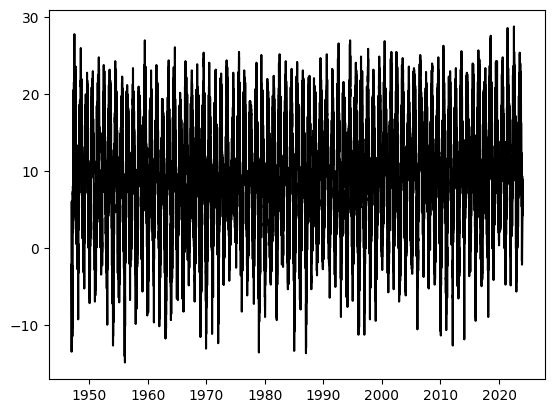

In [81]:
fig, ax = plt.subplots()
ax.plot(data.index, data['TMK'], color="black")

To not mess up the sample spacing, we could replace any NaNs with the previous value.
For this data set it is not necessary for the columns we are interested in.

In [18]:
# data.bfill()

## Analysis

Determine whether the previous day's temperature is related to that of the following day => correlation between todays temperature and yesterday's temperature

Text(0, 0.5, "current day's temperature")

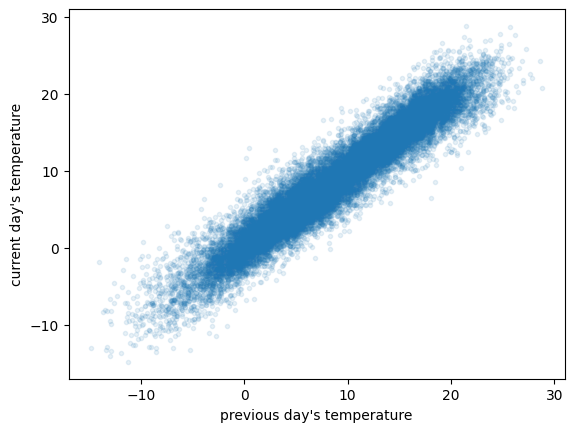

In [82]:
plt.scatter(data['TMK'][:-1], data['TMK'][1:], marker='.', alpha=0.1)
plt.xlabel("previous day's temperature")
plt.ylabel("current day's temperature")

correlation coefficients:
[[1.        0.8775102]
 [0.8775102 1.       ]]


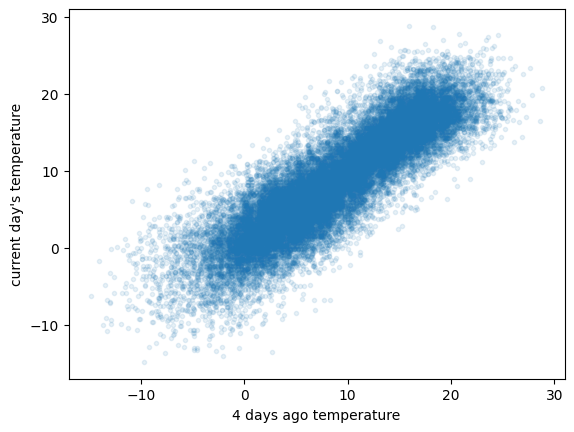

In [83]:
shift = 4

x = data['TMK'][:-shift]
y = data['TMK'][shift:]

print("correlation coefficients:")
print(np.corrcoef(x, y))

plt.scatter(x, y, marker='.', alpha=0.1)
plt.xlabel("%s days ago temperature" % shift)
plt.ylabel("current day's temperature")
plt.show()

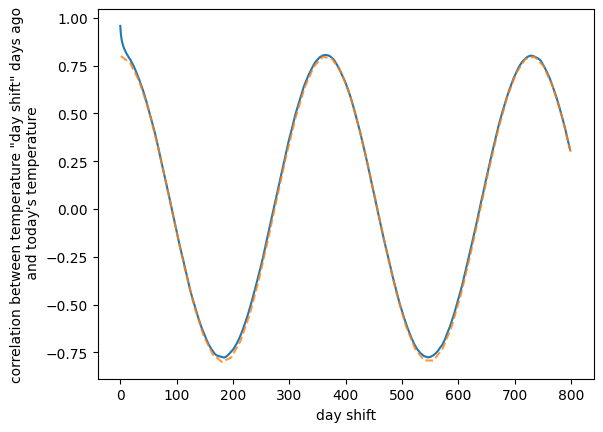

In [109]:
ldata = data#data["2021-01-01":"2022-12-31"]

corrs = []

max_shift = 800
for shift in range(1, max_shift):
    x = ldata['TMK'][:-shift]
    y = ldata['TMK'][shift:]
    corr = np.corrcoef(x, y)
    corrs.append(corr[0][1])


plt.plot(corrs)
p = np.linspace(1, max_shift)
plt.plot(p, 0.8*np.cos(2*np.pi * p / 365), alpha=0.8, linestyle="dashed")
plt.xlabel("day shift")
plt.ylabel("correlation between temperature \"day shift\" days ago\n and today's temperature")
plt.show()

makes sense because you would expect the temperature today to be quite similar to that 365 days ago 

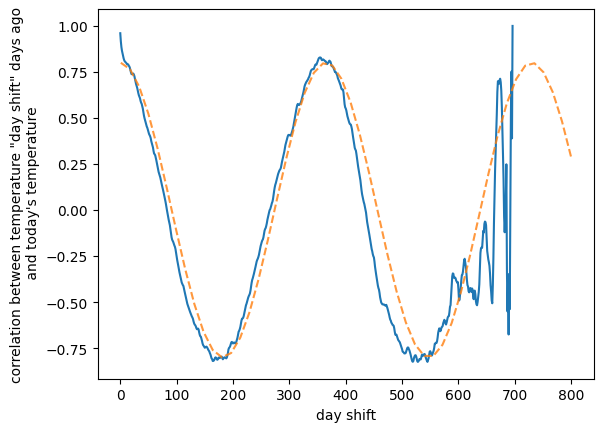

In [116]:
ldata = data["2021-02-01":"2022-12-31"]

corrs = []

max_shift = 800
for shift in range(1, max_shift):
    x = ldata['TMK'][:-shift]
    y = ldata['TMK'][shift:]
    corr = np.corrcoef(x, y)
    corrs.append(corr[0][1])


plt.plot(corrs)
p = np.linspace(1, max_shift)
plt.plot(p, 0.8*np.cos(2*np.pi * p / 365), alpha=0.8, linestyle="dashed")
plt.xlabel("day shift")
plt.ylabel("correlation between temperature \"day shift\" days ago\n and today's temperature")
plt.show()

whatever happened there...

## Median temperatures

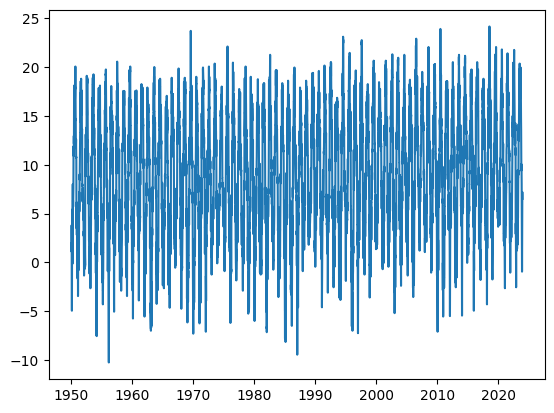

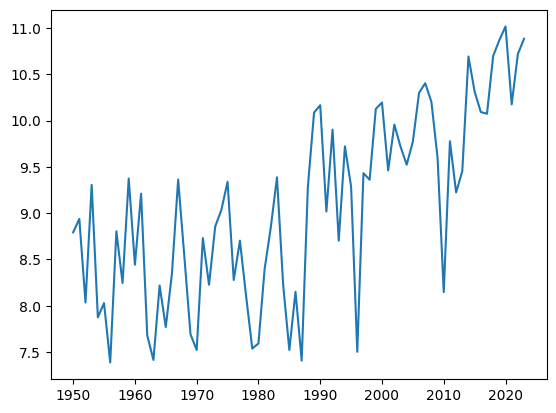

In [172]:
ldata = data["1950":"2023"]

# 10 day rolling median
median_temps = ldata['TMK'].rolling(window=10).median()
plt.plot(ldata.index, median_temps)
plt.show()

# daily median
medians = ldata['TMK'].groupby(ldata.index.year).mean()
plt.plot(medians.index, medians)
#plt.plot(medians.index, medians)
#plt.show()

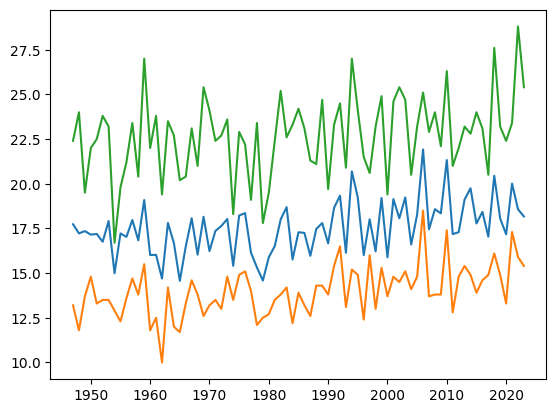

In [227]:
# average temperature in a specific month
ldata = data[data.index.month == 7]
means = ldata['TMK'].groupby(ldata.index.year).mean()
mins = ldata['TMK'].groupby(ldata.index.year).min()
maxs = ldata['TMK'].groupby(ldata.index.year).max()
plt.plot(means.index, means)
plt.plot(means.index, mins)
plt.plot(means.index, maxs)

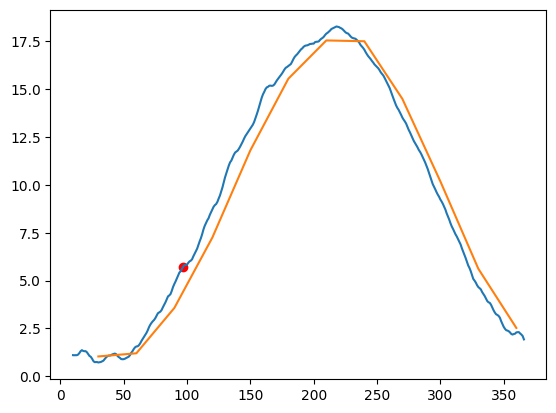

In [298]:
# 10 day average over the year
means = data['TMK'].groupby(data.index.dayofyear).mean().rolling(10).mean()
a = data['TMK'].groupby(data.index.month).mean()
plt.plot(means.index, means)
plt.plot(a.index * 30, a)
plt.scatter(today.dayofyear, means[means.index==today.dayofyear], color="red")

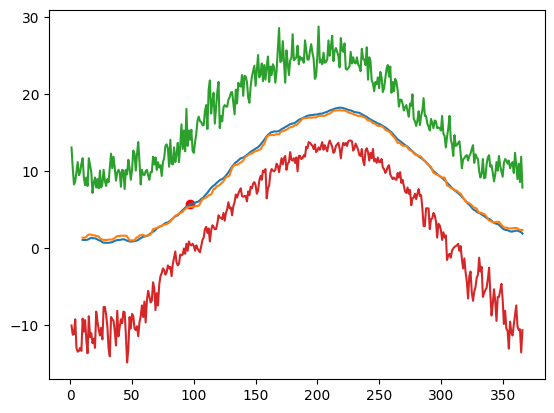

In [315]:
means = data['TMK'].groupby(data.index.dayofyear).mean().rolling(10).mean()
meds = data['TMK'].groupby(data.index.dayofyear).median().rolling(10).median()
maxs = data['TMK'].groupby(data.index.dayofyear).max().rolling(1).max()
mins = data['TMK'].groupby(data.index.dayofyear).min().rolling(1).min()
plt.plot(means.index, means)
plt.plot(meds.index, meds)
plt.plot(maxs.index, maxs)
plt.plot(mins.index, mins)
plt.scatter(today.dayofyear, means[means.index==today.dayofyear], color="red")

Text(2015, 38.4, '38.4')

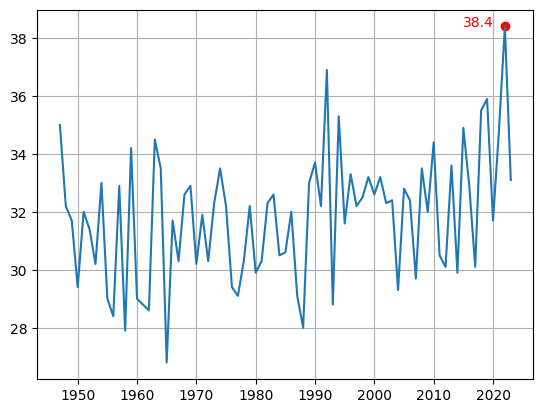

In [29]:
ldata = data
yearly_max_temps = ldata['TXK'].groupby(ldata.index.year).max()

max_year = yearly_max_temps.index[yearly_max_temps.argmax()]
max_temp = yearly_max_temps.max()

fig, ax = plt.subplots()
ax.plot(yearly_max_temps.index, yearly_max_temps)
ax.scatter(max_year, max_temp, color="red")
ax.grid()
ax.annotate(str(max_temp), (max_year - 7, max_temp), color="red")

## Just messing around

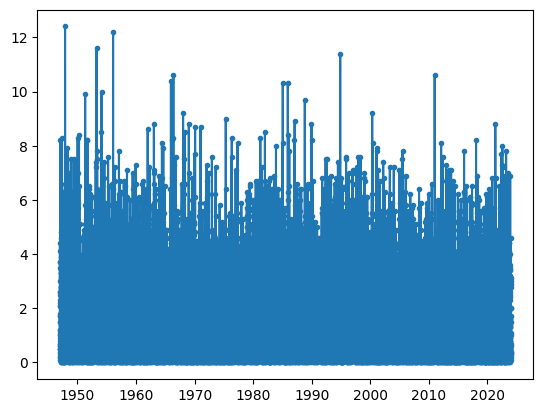

In [85]:
diff = data['TMK'].diff()
plt.plot(data.index, abs(diff), marker='.')

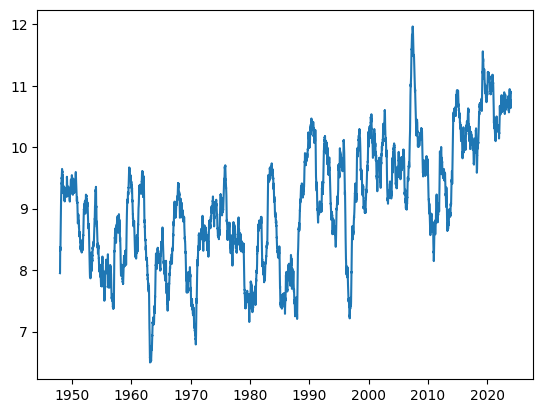

In [86]:
plt.plot(data.index, data['TMK'].rolling(window=365).mean())

(array([  43.,  307., 1154., 4055., 5938., 5089., 6007., 4522.,  949.,
          60.]),
 array([-14.8 , -10.44,  -6.08,  -1.72,   2.64,   7.  ,  11.36,  15.72,
         20.08,  24.44,  28.8 ]),
 <BarContainer object of 10 artists>)

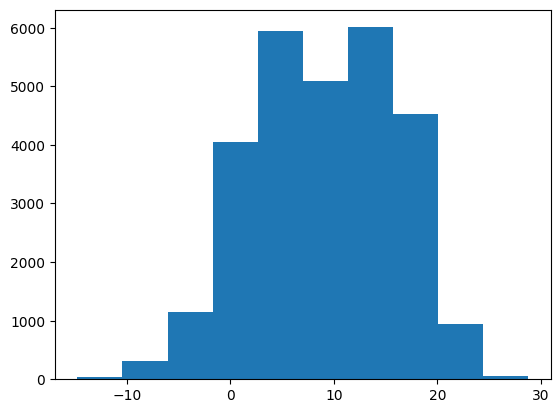

In [16]:
plt.hist(data['TMK'])

## Modeling

In [11]:
def predict_basic(date, data):
    '''
    Predict the temperature for a given date
    in the future
    '''
    date = pd.to_datetime(date)

    # construct a simple model
    means = data['TMK'].groupby(data.index.dayofyear).mean()

    return means[means.index==date.dayofyear].iloc[0]

In [12]:
predict_basic(today, data)

6.02987012987013

In [21]:
# residulas
preds = []
for date in data.index:
    data.loc[date, 'prediction'] = predict_basic(date, data)


In [23]:
data['prediction_residuals'] = data['TMK'] - data['prediction']

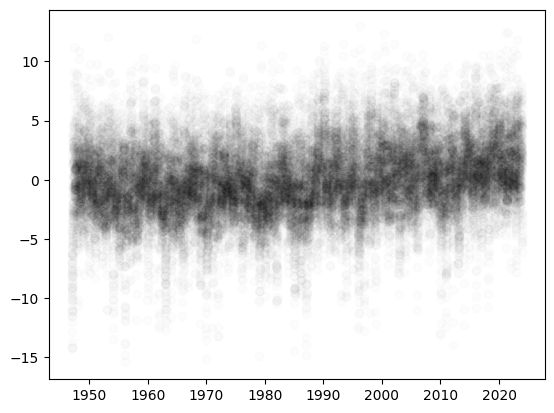

In [38]:
plt.scatter(data.index, data['prediction_residuals'], color='black', alpha=0.01)

Text(0, 0.5, 'temperature deviation from prediction')

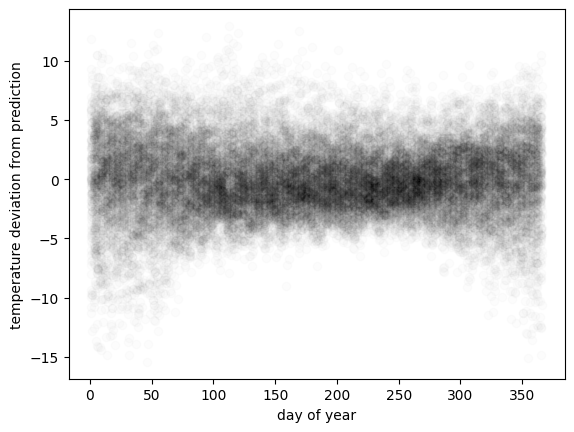

In [39]:
#ldata = data['prediction_residuals'].groupby(data.index.dayofyear)
ldata
plt.scatter(data.index.dayofyear, data['prediction_residuals'], color='black', alpha=0.01)
plt.xlabel("day of year")
plt.ylabel("temperature deviation from prediction")

In [41]:
data['prediction_residuals'].std()

3.127681812597835

(array([   25.,   105.,   358.,  1688.,  7470., 10428.,  5825.,  1866.,
          323.,    36.]),
 array([-15.42597403, -12.58857143,  -9.75116883,  -6.91376623,
         -4.07636364,  -1.23896104,   1.59844156,   4.43584416,
          7.27324675,  10.11064935,  12.94805195]),
 <BarContainer object of 10 artists>)

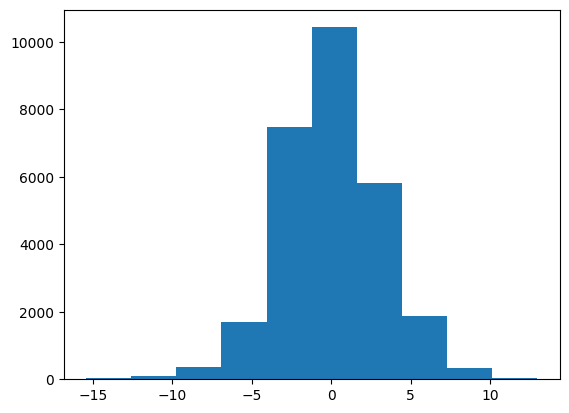

In [42]:
plt.hist(data['prediction_residuals'])

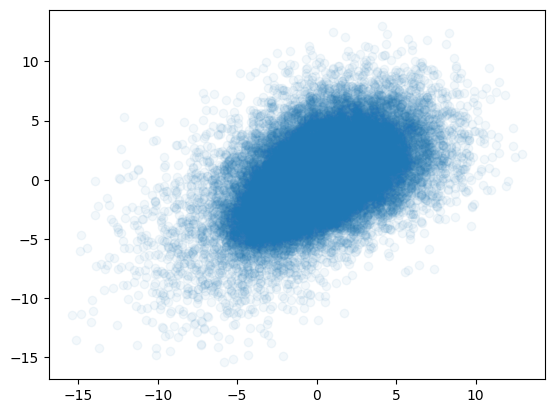

In [61]:
shift = 3
plt.scatter(data['prediction_residuals'][:-shift], data['prediction_residuals'][shift:], alpha=0.05)

In [48]:
# this line is supposed to relate the residuals to the residuals "shift" (e.g. 3) days later
slope, intercept = np.polyfit(data['prediction_residuals'][:-shift], data['prediction_residuals'][shift:], 1)

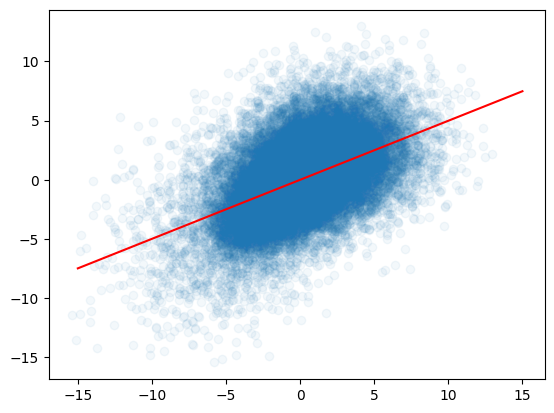

In [50]:
plt.scatter(data['prediction_residuals'][:-shift], data['prediction_residuals'][shift:], alpha=0.05)
x = np.linspace(-15,15)
plt.plot(x, [slope * xi + intercept for xi in x], color="red")

In [53]:
print("RMSE before: ", np.sqrt(np.mean(data['prediction_residuals']**2)))
print("MAE before: ", np.mean(np.abs(data['prediction_residuals']**2)))

RMSE before:  3.1276262068942424
MAE before:  9.782045690051666


In [56]:
shift_day_residuals = data['prediction_residuals'][shift:] - (intercept + slope * data['prediction_residuals'][:-shift])
print("RMSE after: ", np.sqrt(np.mean(shift_day_residuals**2)))
print("MAE after: ", np.mean(np.abs(shift_day_residuals**2)))

RMSE after:  1.5679167401727603
MAE after:  2.4583629041139754
